In [495]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('dark')

import torch
import torch.nn as nn

## Utils

In [496]:
def plot_lines(x, y, h1, h2, h3, h1_a, h2_a, h3_a, t10, t11, t20, t21, t30, t31, w0, w1, w2, w3, act='relu'):

    # First Row, h and h_a
    fig, axs = plt.subplots(1, 3, figsize=(12,3), sharey=True)

    for ax in axs:
        ax.axhline(0, color='gray', lw=0.5)
        ax.axvline(0, color='gray', lw=0.5)
        ax.set_xlim(-1, 1)
        ax.set_ylim(-4, 4)

    axs[0].plot(x, h1, c='gray', label='h1')
    axs[0].plot(x, h1_a, c='blue', label=f'{act}(h1)')
    axs[0].axvline(-1*t10/t11, color='blue', lw=0.5, linestyle='--', label='h1=0')
    axs[0].set_title('h1')

    axs[1].plot(x, h2, c='gray', label='h2')
    axs[1].plot(x, h2_a, c='green', label=f'{act}(h2)')
    axs[1].axvline(-1*t20/t21, color='green', lw=0.5, linestyle='--', label='h2=0')
    axs[1].set_title('h2')

    axs[2].plot(x, h3, c='gray', label='h3')
    axs[2].plot(x, h3_a, c='red', label=f'{act}(h3)')
    axs[2].axvline(-1*t30/t31, color='red', lw=0.5, linestyle='--', label='h3=0')
    axs[2].set_title('h3')

    for ax in axs:
        ax.legend()

    # Second Row, weighted h_a
    fig, axs = plt.subplots(1, 3, figsize=(12,3), sharey=True)

    for ax in axs:
        ax.axhline(0, color='gray', lw=0.5)
        ax.axvline(0, color='gray', lw=0.5)
        ax.set_xlim(-1, 1)
        ax.set_ylim(-4, 4)

    axs[0].plot(x, w1*h1_a, c='blue', label=f'w1*{act}(h1)')
    axs[0].axvline(-1*t10/t11, color='blue', lw=0.5, linestyle='--', label='h1=0')
    axs[0].set_title('w1*h1')

    axs[1].plot(x, w2*h2_a, c='green', label=f'w2*{act}(h2)')
    axs[1].axvline(-1*t20/t21, color='green', lw=0.5, linestyle='--', label='h2=0')
    axs[1].set_title('w2*h2')

    axs[2].plot(x, w3*h3_a, c='red', label=f'w3*{act}(h3)')
    axs[2].axvline(-1*t30/t31, color='red', lw=0.5, linestyle='--', label='h3=0')
    axs[2].set_title('w3*h3')

    for ax in axs:
        ax.legend()

    # Third Row y
    fig, ax = plt.subplots(1, figsize=(6,4))
    # show the coordinate system
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-6, 6)

    ax.set_title('y')
    ax.plot(x, w1*h1_a, label=f'w1*{act}(h1)', c='blue')
    ax.plot(x, w2*h2_a, label=f'w2*{act}(h2)', c='green')
    ax.plot(x, w3*h3_a, label=f'w3*{act}(h3)', c='red')
    ax.plot(x, y, label='y', c='black')
    ax.axvline(-1*t10/t11, color='blue', lw=0.5, linestyle='--', label='h1=0')
    ax.axvline(-1*t20/t21, color='green', lw=0.5, linestyle='--', label='h2=0')
    ax.axvline(-1*t30/t31, color='red', lw=0.5, linestyle='--', label='h3=0')
    ax.legend()
    
    plt.show()

## Part 1) Manual Shallow NN

A **shallow neural network**  is basically $f(x) = y$ where each neuron is

$h_1(x) = \theta_{10} + \theta_{11}x\\$
$h_2(x) = \theta_{20} + \theta_{21}x\\$
$h_3(x) = \theta_{30} + \theta_{31}x\\$

shallow NN:

$f(x) = w_{0} + w_{1}*act(h_1(x)) + w_{2}*act(h_2(x)) + w_{3}*act(h_3(x))$

params count: 10


### First manual function

In [497]:
def act(x):
    # Relu
    return np.maximum(0, x)

In [498]:
x = np.linspace(-1, 1, 1000)

t10 = -1
t11 = 2
t20 = 1
t21 = 3
t30 = 0.6
t31 = -4

h1 = t10 + t11*x
h2 = t20 + t21*x
h3 = t30 + t31*x

h1_a = act(h1)
h2_a = act(h2)
h3_a = act(h3)

w0 = 0
w1 = 1
w2 = 1
w3 = 1

y = w0 + w1*h1_a + w2*h2_a + w3*h3_a

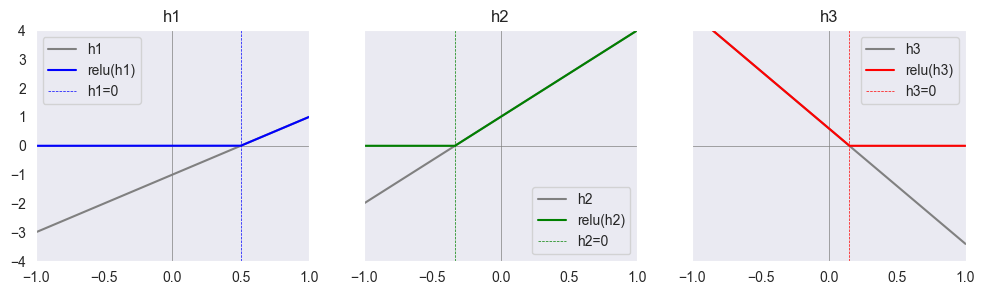

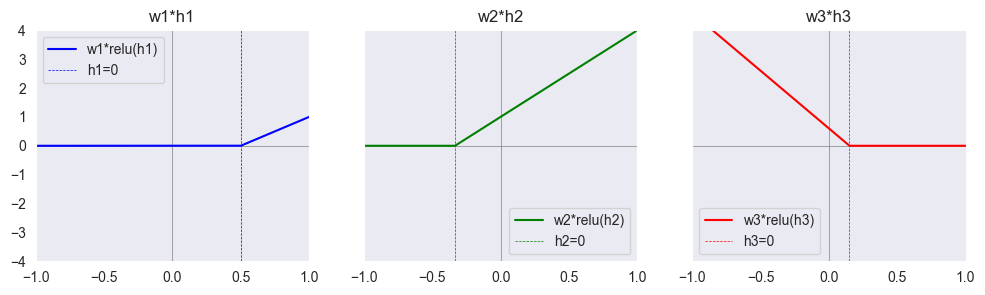

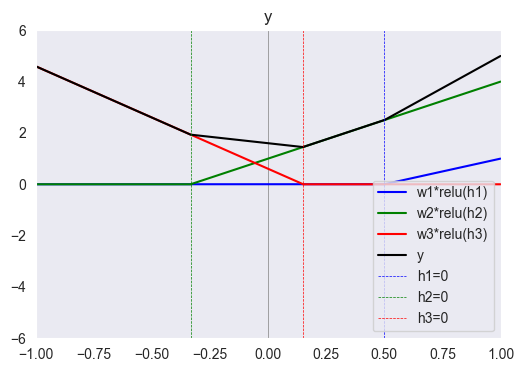

In [499]:
plot_lines(x, y, h1, h2, h3, h1_a, h2_a, h3_a, t10, t11, t20, t21, t30, t31, w0, w1, w2, w3, act='relu')

### Try with Identity activation (non-linearity is important)

In [500]:
def act(x):
    # Identity
    return x

In [501]:
x = np.linspace(-1, 1, 1000)

t10 = -1
t11 = 2
t20 = 1
t21 = 3
t30 = 0.6
t31 = -4

h1 = t10 + t11*x
h2 = t20 + t21*x
h3 = t30 + t31*x

h1_a = act(h1)
h2_a = act(h2)
h3_a = act(h3)

w0 = 0
w1 = 1
w2 = 1
w3 = 1

y = w0 + w1*h1_a + w2*h2_a + w3*h3_a

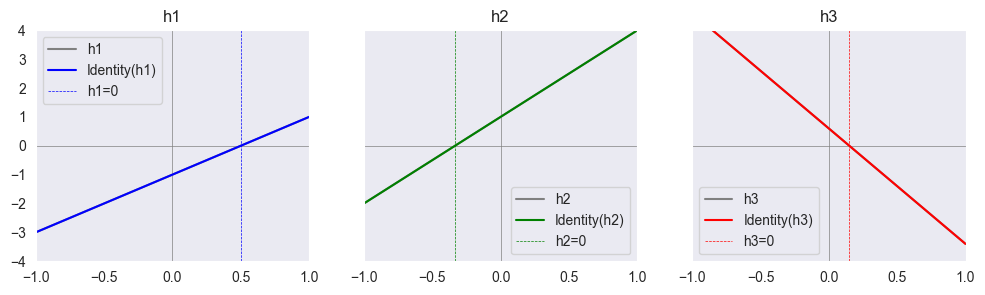

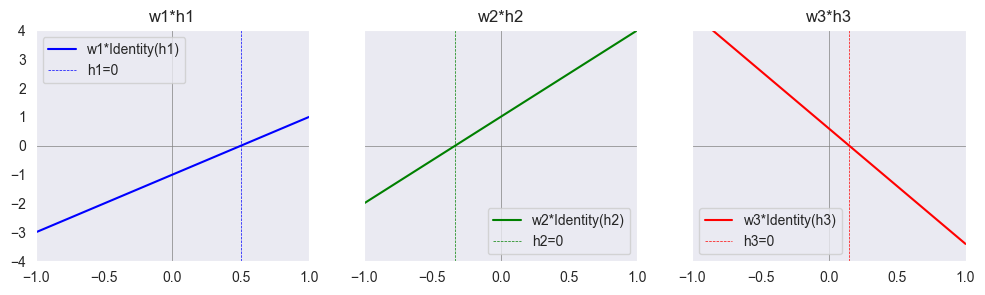

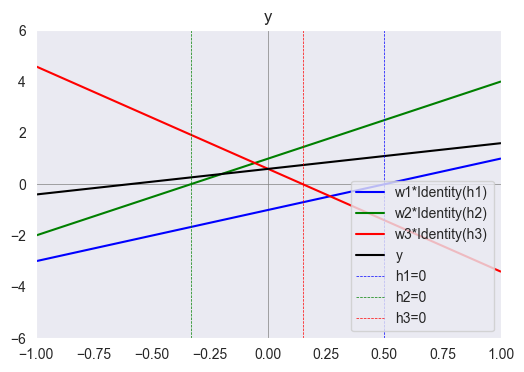

In [502]:
plot_lines(x, y, h1, h2, h3, h1_a, h2_a, h3_a, t10, t11, t20, t21, t30, t31, w0, w1, w2, w3, act="Identity")

**without non-linearity this model is just another line! (properties of linear functions)**

### Second manual function

In [503]:
def act(x):
    # Relu
    return np.maximum(0, x)

In [504]:
x = np.linspace(-1, 1, 1000)

t10 = -1
t11 = 4
t20 = 1
t21 = 3
t30 = 0.6
t31 = -4

h1 = t10 + t11*x
h2 = t20 + t21*x
h3 = t30 + t31*x

h1_a = act(h1)
h2_a = act(h2)
h3_a = act(h3)

w0 = 0
w1 = -1
w2 = -1
w3 = 1

y = w0 + w1*h1_a + w2*h2_a + w3*h3_a

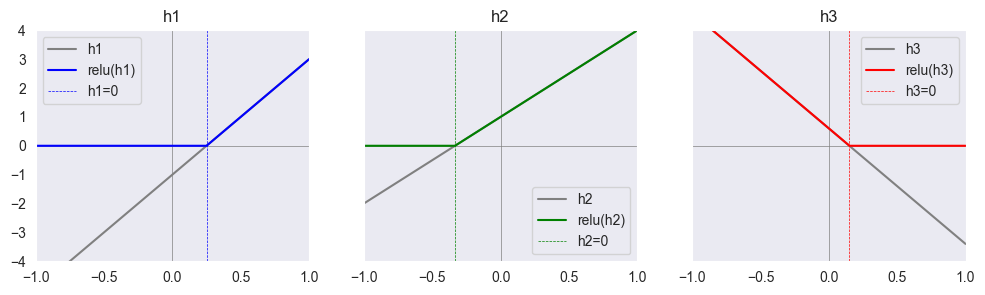

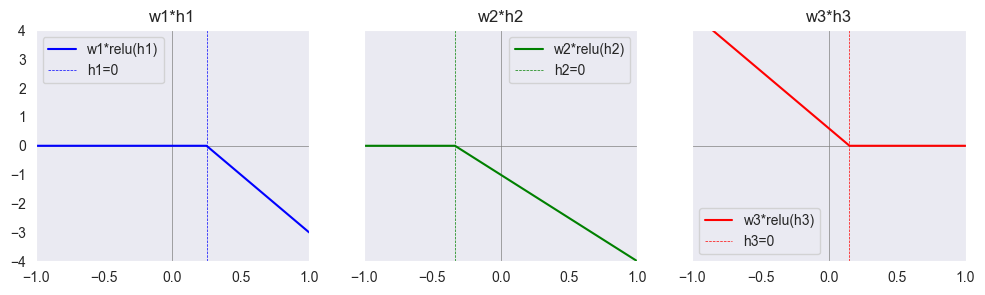

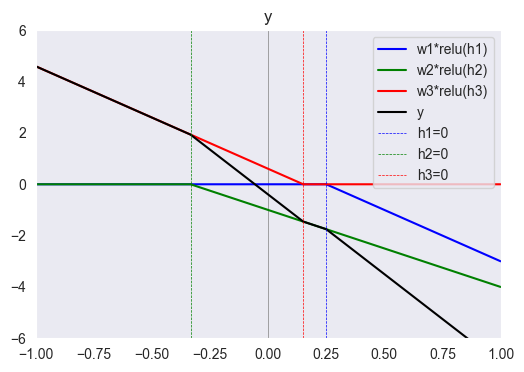

In [505]:
plot_lines(x, y, h1, h2, h3, h1_a, h2_a, h3_a, t10, t11, t20, t21, t30, t31, w0, w1, w2, w3, act='relu')

As we can see, by changing the parameters(10 in this case) we can model any function that can be constructed using 4(3+1) linear segments.

In the next part, we try to approximate sin(x) using a shallow neural network but this time we update the weights using gradient descent instead of manually changing them.

## Part 2) Using PyTorch to approximate sin(x)

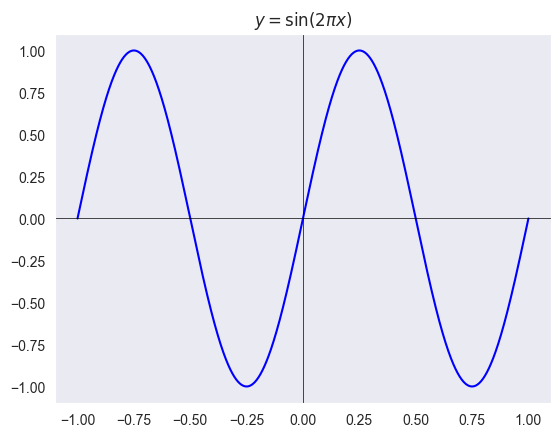

In [506]:
x = np.linspace(-1, 1, 10000)
y = np.sin(2*np.pi*x)

plt.plot(x, y, c='blue')
plt.title(r'$y = \sin(2\pi x)$')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

We probably can model this function using 5 line segments (with low accuracy however)

So a total of **4 hidden neurons** (joints) is needed.

In [507]:
dataset = torch.utils.data.TensorDataset(torch.from_numpy(x).float(), torch.from_numpy(y).float())
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [508]:
next(iter(dataloader))

[tensor([ 0.8900, -0.5240,  0.0937, -0.6694, -0.5022,  0.0733, -0.0775, -0.7120,
         -0.6894, -0.5028,  0.4803,  0.6554, -0.1317, -0.7532,  0.2751,  0.7484,
          0.2759,  0.2433,  0.1609, -0.0349,  0.9754,  0.2397,  0.7296,  0.5032,
         -0.6244,  0.9576, -0.8342, -0.0917,  0.2317, -0.8292,  0.1251, -0.9672]),
 tensor([-0.6375,  0.1499,  0.5554,  0.8744,  0.0135,  0.4445, -0.4680,  0.9716,
          0.9283,  0.0173,  0.1232, -0.8284, -0.7363,  0.9998,  0.9876, -0.9999,
          0.9868,  0.9991,  0.8474, -0.2176, -0.1540,  0.9979, -0.9918, -0.0198,
          0.7043, -0.2633,  0.8633, -0.5449,  0.9934,  0.8788,  0.7076,  0.2047])]

In [518]:
def create_and_fit_nn(x, y, num_hidden=3, lr=0.001, num_epochs=10):
    '''
    This function creates and trains a shallow(1 hidden layer) neural network with relu activation functions. 
    Args:
        x: the input data.
        y: the target data.
        num_hidden: the number of neurons in the hidden layer.
    Return:
        the trained model.
        loss_history
    '''
    # Device
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    print(f"[INFO] Using device {device}")

    # create dataloader from x, y which are numpy arrays, we dont want test/valid split. we just want to overfit the model to the function
    dataset = torch.utils.data.TensorDataset(torch.from_numpy(x).float(), torch.from_numpy(y).float())
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


    # Create the model
    model = nn.Sequential(
        nn.Linear(1, num_hidden),
        nn.ReLU(),
        nn.Linear(num_hidden, 1)
    )
    model.to(device)

    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Train the model
    # num_epochs = 0
    loss_hist = []
    for epoch in range(num_epochs):
        loss = 0.0
        for i, (inputs, targets) in enumerate(dataloader):
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            # import pdb; pdb.set_trace()
            outputs = model(inputs.unsqueeze(1))
            loss = criterion(outputs, targets.unsqueeze(1))

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss += loss.cpu().item()
        

            # if (i+1) % 10 == 0:
            #     print(f"Step [{i+1}/{len(dataloader)}], Loss: {loss.item()}")

        loss /= len(dataloader)
        loss_hist.append(loss.detach().cpu().numpy())
        print(f"Epoch [{epoch+1}/{num_epochs}] loss: {loss:.8f}")
        
    return model.cpu(), loss_hist

In [527]:
model, loss_hist = create_and_fit_nn(x, y, num_hidden=250, lr=0.001, num_epochs=50)

[INFO] Using device cpu
Epoch [1/50] loss: 0.001070
Epoch [2/50] loss: 0.000529
Epoch [3/50] loss: 0.000278
Epoch [4/50] loss: 0.000197
Epoch [5/50] loss: 0.000117
Epoch [6/50] loss: 0.000118
Epoch [7/50] loss: 0.000021
Epoch [8/50] loss: 0.000028
Epoch [9/50] loss: 0.000031
Epoch [10/50] loss: 0.000011
Epoch [11/50] loss: 0.000011
Epoch [12/50] loss: 0.000004
Epoch [13/50] loss: 0.000003
Epoch [14/50] loss: 0.000003
Epoch [15/50] loss: 0.000001
Epoch [16/50] loss: 0.000001
Epoch [17/50] loss: 0.000001
Epoch [18/50] loss: 0.000001
Epoch [19/50] loss: 0.000000
Epoch [20/50] loss: 0.000000
Epoch [21/50] loss: 0.000002
Epoch [22/50] loss: 0.000001
Epoch [23/50] loss: 0.000000
Epoch [24/50] loss: 0.000001
Epoch [25/50] loss: 0.000001
Epoch [26/50] loss: 0.000001
Epoch [27/50] loss: 0.000000
Epoch [28/50] loss: 0.000000
Epoch [29/50] loss: 0.000000
Epoch [30/50] loss: 0.000000
Epoch [31/50] loss: 0.000000
Epoch [32/50] loss: 0.000000
Epoch [33/50] loss: 0.000000
Epoch [34/50] loss: 0.000000

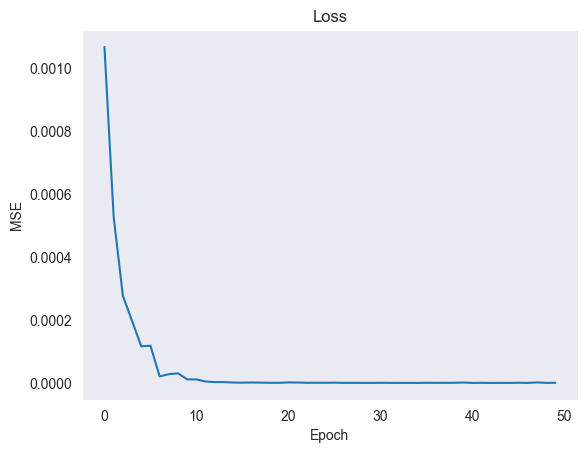

In [528]:
# plot loss
plt.plot(loss_hist)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

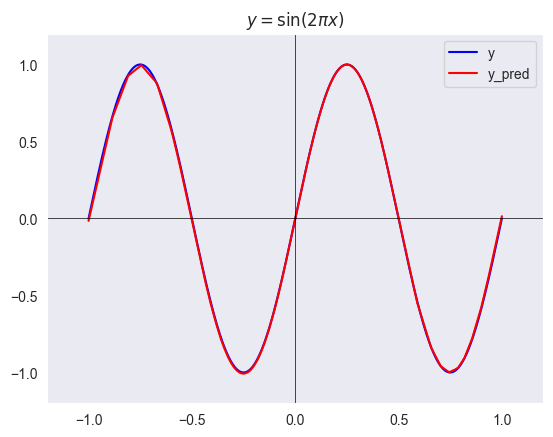

In [529]:
x_pred = np.linspace(-1, 1, 10000)
with torch.inference_mode():
    y_pred = model(torch.from_numpy(x_pred).float().unsqueeze(1)).detach().cpu().numpy()

zero_points = [-1*model[0].bias[i].item()/model[0].weight[i].item() for i in range(len(model[0].weight))]

# Plot the prediction
plt.title(r'$y = \sin(2\pi x)$')
plt.plot(x, y, c='blue', label='y')
plt.plot(x_pred, y_pred, c='red', label='y_pred')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

# plot zero point lines
colors = ['blue', 'green', 'red', 'orange', 'magenta', 'cyan', 'yellow', 'maroon', 'navy']
# for i in range(len(zero_points)):
#     plt.axvline(zero_points[i], color=colors[i%len(colors)], lw=0.5, linestyle='--', label=f'h{i+1}=0')

plt.legend()
plt.show()

Done!!!!!!!!!!!!